In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
# CALCULATE ALL OF THAT FOR EACH FOLDER 
# CREATE A DATAFRAME WITH IT ALL

# this function iterates through files in a folder and calculates a list of distances (one list for all files; they are from the same condition)

def distance_plot_repeat(directory):

    # all the distances 

    distance_all_repeats = [ ]

    # os.listdir iterates through the directory to see whats in there ! 
    # this for loop should go through every file and synthesis a list of distances (from the same condition/folder!)

    for file in os.listdir(directory):

        # check csv
        if file.endswith("csv"):

            # join the directory and filename so you can read it

            file_path = os.path.join(directory, file)
            
            # read the csv file
            df = pd.read_csv(file_path)


            # now for every file we want to calculate the distances 

            # pixel to cm conversion 
            pixels_to_cm = 9 / 888

            # define centre coordinates 
            centre_x, centre_y = 600, 600

 
            def distance(x, y, centre_x, centre_y):
                 distance_pixels = np.sqrt((x - centre_x)**2 + (y - centre_y)**2)
                 distance_cm = distance_pixels * pixels_to_cm
                 return distance_cm
            

            # iterate through every row in one file 

            for i, row in df.iterrows():
                 
                 x1 = row["X"]
                 y1 = row["Y"]

                 value = distance(x1, y1, centre_x, centre_y)

                 # adds each distance to the list 

                 distance_all_repeats.append(value)

    # now we have the distance list for every file, create the bins 
                 
    max_distance = max(distance_all_repeats)

    # latter parts didnt work without allowing for an additional 0.1 to max distance- ask michael why without +0.1 didnt work 

    bins = np.arange(0, max_distance +0.1, 0.1)

    # now for every bin count how many distances fall into it 

    bin_count_dictionary = {}

    for i, bin in enumerate(bins):

                     
        count = 0
                     
        for dist in distance_all_repeats:

            # cant include the last index because then i + 1 doesnt work 

            if i < len(bins):
                  
                 if (bin <= dist < bins[i+1]):
                      count +=1
            
            else:
                 # refers to the last bin (which is max + 0.1- doesnt work without this)
                 # accounting for any distances = to the max distance 
                 if bin <= dist:
                      count += 1
                      
               
            bin_count_dictionary[bin] = count

    # every bin should have a count now 
            
    # now we want to turn the bin and counts into a dataframe 
    # for some reason this doesnt work (ask michael, something about the column assignment) unless the dictionary is saved as a tuple 
            
    bin_count_tuple =  [(bin, count) for bin,count in bin_count_dictionary.items()]


    bin_count_df = pd.DataFrame(bin_count_tuple, columns=['Bin', 'Count'])


    count_sum = bin_count_df['Count'].sum()

    bin_count_df['Percentage_time'] = bin_count_df['Count'] / count_sum

    # shd return the dataframe for all the repeats of one condition (bins, counts, percentage time)
    return bin_count_df

    
# dataframe for every condition 
distance_per_condition = pd.DataFrame()


for subdir, dirs, files in os.walk('/Volumes/lab-windingm/home/users/cochral/AttractionRig/Videos/Glued/manual-tracking'):
    
    for dir in dirs:

        dir_path = os.path.join(subdir, dir)

        # returns a dataframe for that condition (the folder) for bins, counts, and percentage time 

        condition_distance = distance_plot_repeat(dir_path)
        
        # speed_per_condition[dir] = speed_list this was used before and didnt work because there were different lengths of speed 

        # Assign the speed list to the DataFrame with the folder name as the column name
        # Use .loc to accommodate different lengths of speed lists
        # because loc is used and specifying all rows (:) with the column dir, Pandas will automatically handle the length of speed_list. 
        #If speed_list is shorter than the number of rows in the DataFrame, the remaining rows will be filled with NaN. If it's longer, the DataFrame will be extended to accommodate the new length.
        # The use of .loc and pd.Series ensures that the lists are correctly converted and aligned within the DataFrame, even if they have different lengths.


        # Add a column for the condition (directory name)
        condition_distance['Condition'] = dir
        
        # Concatenate the results vertically
        distance_per_condition = pd.concat([distance_per_condition, condition_distance], ignore_index=True)


        # distance_per_condition.loc[:, dir] = pd.Series(condition_distance)


distance_per_condition


,Bin,Count,Percentage_time,Condition
0,0.0,0,0.000000,Dead-5
1,0.1,2,0.000669,Dead-5
2,0.2,12,0.004013,Dead-5
3,0.3,14,0.004682,Dead-5
4,0.4,14,0.004682,Dead-5
...,...,...,...,...
945,6.3,16,0.005371,Glue-5
946,6.4,35,0.011749,Glue-5
947,6.5,43,0.014434,Glue-5
948,6.6,7,0.002350,Glue-5


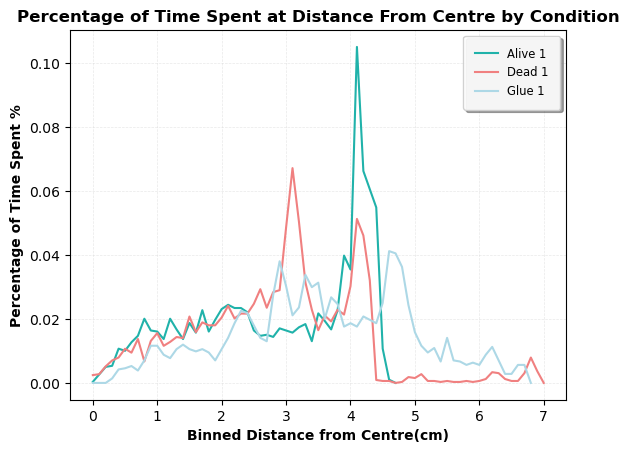

In [6]:
# USE THE DATAFRAME TO SPECIFY WHICH PLOTS TO OVERLAY 


# filter for conditions 

Alive_1 = distance_per_condition[distance_per_condition['Condition'] == 'Alive-1']
Dead_1 = distance_per_condition[distance_per_condition['Condition'] == 'Dead-1']
Glue_1 = distance_per_condition[distance_per_condition['Condition'] == 'Glue-1']




plt.plot(Alive_1['Bin'], Alive_1['Percentage_time'], label= 'Alive 1', color='lightseagreen')
plt.plot(Dead_1['Bin'], Dead_1['Percentage_time'], label = 'Dead 1', color='lightcoral')
plt.plot(Glue_1['Bin'], Glue_1['Percentage_time'], label='Glue 1', color='lightblue')


plt.xlabel('Binned Distance from Centre(cm)', fontweight='bold')
plt.ylabel('Percentage of Time Spent %', fontweight='bold')
plt.title('Percentage of Time Spent at Distance From Centre by Condition', fontweight='bold')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.5,)

plt.legend(fontsize='small', shadow=True, fancybox=True, framealpha=0.9, borderpad=1)
    
plt.show()


# why distance from centre so crazy 

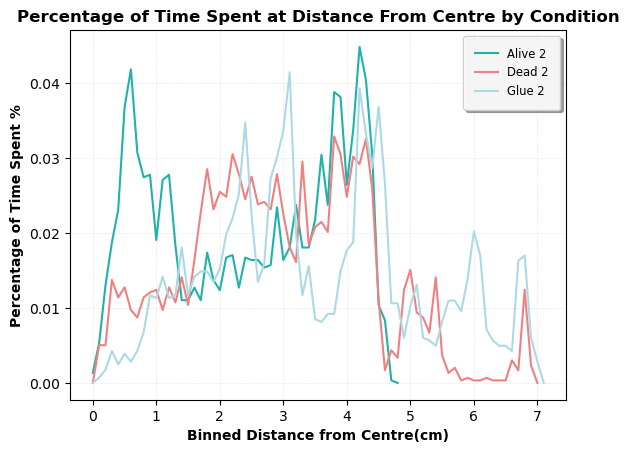

In [7]:
Alive_2 = distance_per_condition[distance_per_condition['Condition'] == 'Alive-2']
Dead_2 = distance_per_condition[distance_per_condition['Condition'] == 'Dead-2']
Glue_2 = distance_per_condition[distance_per_condition['Condition'] == 'Glue-2']




plt.plot(Alive_2['Bin'], Alive_2['Percentage_time'], label= 'Alive 2', color='lightseagreen')
plt.plot(Dead_2['Bin'], Dead_2['Percentage_time'], label = 'Dead 2', color='lightcoral')
plt.plot(Glue_2['Bin'], Glue_2['Percentage_time'], label='Glue 2', color='lightblue')


plt.xlabel('Binned Distance from Centre(cm)', fontweight='bold')
plt.ylabel('Percentage of Time Spent %', fontweight='bold')
plt.title('Percentage of Time Spent at Distance From Centre by Condition', fontweight='bold')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.5,)

plt.legend(fontsize='small', shadow=True, fancybox=True, framealpha=0.9, borderpad=1)
    
plt.show()

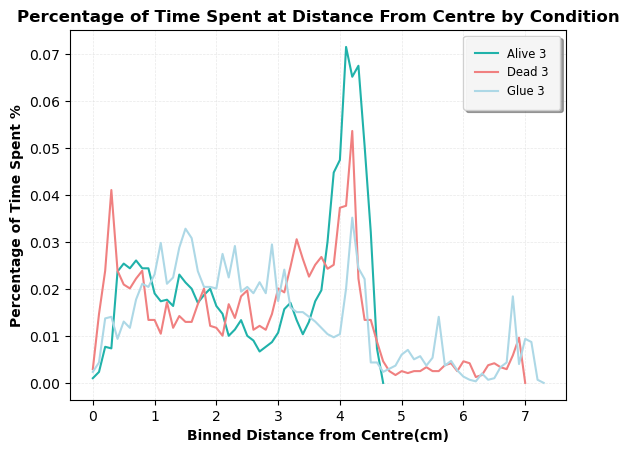

In [8]:
Alive_3 = distance_per_condition[distance_per_condition['Condition'] == 'Alive-3']
Dead_3 = distance_per_condition[distance_per_condition['Condition'] == 'Dead-3']
Glue_3 = distance_per_condition[distance_per_condition['Condition'] == 'Glue-3']




plt.plot(Alive_3['Bin'], Alive_3['Percentage_time'], label= 'Alive 3', color='lightseagreen')
plt.plot(Dead_3['Bin'], Dead_3['Percentage_time'], label = 'Dead 3', color='lightcoral')
plt.plot(Glue_3['Bin'], Glue_3['Percentage_time'], label='Glue 3', color='lightblue')


plt.xlabel('Binned Distance from Centre(cm)', fontweight='bold')
plt.ylabel('Percentage of Time Spent %', fontweight='bold')
plt.title('Percentage of Time Spent at Distance From Centre by Condition', fontweight='bold')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.5,)

plt.legend(fontsize='small', shadow=True, fancybox=True, framealpha=0.9, borderpad=1)
    
plt.show()

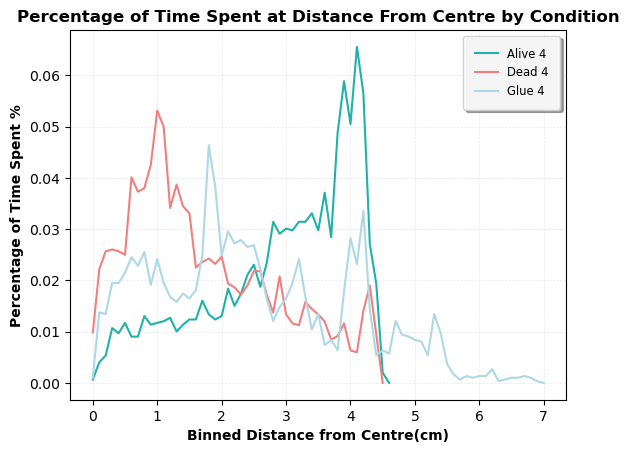

In [9]:
Alive_4 = distance_per_condition[distance_per_condition['Condition'] == 'Alive-4']
Dead_4 = distance_per_condition[distance_per_condition['Condition'] == 'Dead-4']
Glue_4 = distance_per_condition[distance_per_condition['Condition'] == 'Glue-4']




plt.plot(Alive_4['Bin'], Alive_4['Percentage_time'], label= 'Alive 4', color='lightseagreen')
plt.plot(Dead_4['Bin'], Dead_4['Percentage_time'], label = 'Dead 4', color='lightcoral')
plt.plot(Glue_4['Bin'], Glue_4['Percentage_time'], label='Glue 4', color='lightblue')


plt.xlabel('Binned Distance from Centre(cm)', fontweight='bold')
plt.ylabel('Percentage of Time Spent %', fontweight='bold')
plt.title('Percentage of Time Spent at Distance From Centre by Condition', fontweight='bold')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.5,)

plt.legend(fontsize='small', shadow=True, fancybox=True, framealpha=0.9, borderpad=1)
    
plt.show()

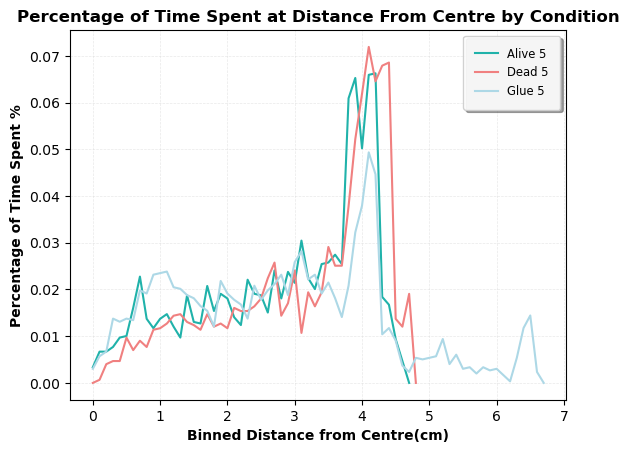

In [10]:
Alive_5 = distance_per_condition[distance_per_condition['Condition'] == 'Alive-5']
Dead_5 = distance_per_condition[distance_per_condition['Condition'] == 'Dead-5']
Glue_5 = distance_per_condition[distance_per_condition['Condition'] == 'Glue-5']




plt.plot(Alive_5['Bin'], Alive_5['Percentage_time'], label= 'Alive 5', color='lightseagreen')
plt.plot(Dead_5['Bin'], Dead_5['Percentage_time'], label = 'Dead 5', color='lightcoral')
plt.plot(Glue_5['Bin'], Glue_5['Percentage_time'], label='Glue 5', color='lightblue')


plt.xlabel('Binned Distance from Centre(cm)', fontweight='bold')
plt.ylabel('Percentage of Time Spent %', fontweight='bold')
plt.title('Percentage of Time Spent at Distance From Centre by Condition', fontweight='bold')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.5,)

plt.legend(fontsize='small', shadow=True, fancybox=True, framealpha=0.9, borderpad=1)
    
plt.show()

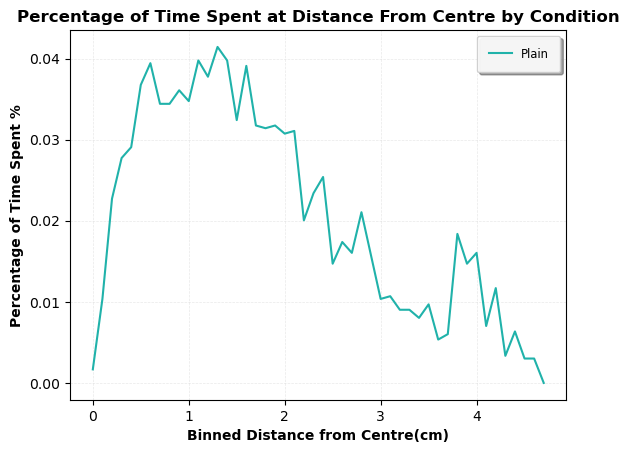

In [11]:
Plain = distance_per_condition[distance_per_condition['Condition'] == 'plain']


plt.plot(Plain['Bin'], Plain['Percentage_time'], label= 'Plain', color='lightseagreen')



plt.xlabel('Binned Distance from Centre(cm)', fontweight='bold')
plt.ylabel('Percentage of Time Spent %', fontweight='bold')
plt.title('Percentage of Time Spent at Distance From Centre by Condition', fontweight='bold')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.5,)

plt.legend(fontsize='small', shadow=True, fancybox=True, framealpha=0.9, borderpad=1)
    
plt.show()

In [12]:



above5_glue5 = distance_per_condition[distance_per_condition['Bin'] > 6.00]

above5_glue5

# never alive > 5 
# glue and dead > 5 
# why does the condition not say glue5?



,Bin,Count,Percentage_time,Condition
156,6.1,10,0.004193,Dead-3
157,6.2,3,0.001258,Dead-3
158,6.3,4,0.001677,Dead-3
159,6.4,9,0.003774,Dead-3
160,6.5,10,0.004193,Dead-3
...,...,...,...,...
945,6.3,16,0.005371,Glue-5
946,6.4,35,0.011749,Glue-5
947,6.5,43,0.014434,Glue-5
948,6.6,7,0.002350,Glue-5


In [13]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

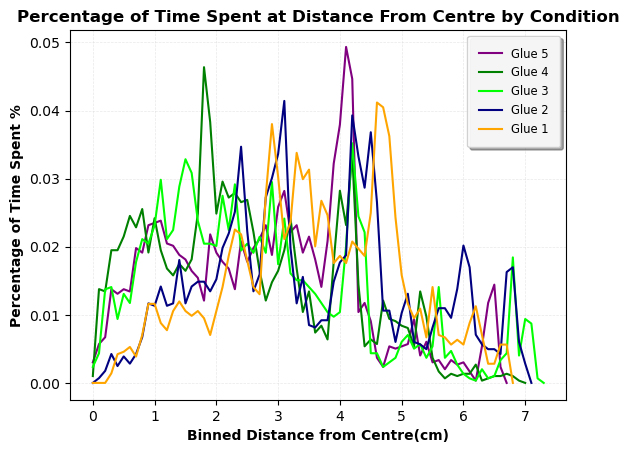

In [23]:

Glue_4 = distance_per_condition[distance_per_condition['Condition'] == 'Glue-4']
Glue_5 = distance_per_condition[distance_per_condition['Condition'] == 'Glue-5']
Glue_3 = distance_per_condition[distance_per_condition['Condition'] == 'Glue-3']
Glue_2 = distance_per_condition[distance_per_condition['Condition'] == 'Glue-2']
Glue_1 = distance_per_condition[distance_per_condition['Condition'] == 'Glue-1']




plt.plot(Glue_5['Bin'], Glue_5['Percentage_time'], label='Glue 5', color='purple')
plt.plot(Glue_4['Bin'], Glue_4['Percentage_time'], label='Glue 4', color='green')

plt.plot(Glue_3['Bin'], Glue_3['Percentage_time'], label='Glue 3', color='lime')
plt.plot(Glue_2['Bin'], Glue_2['Percentage_time'], label='Glue 2', color='navy')
plt.plot(Glue_1['Bin'], Glue_1['Percentage_time'], label='Glue 1', color='orange')

plt.xlabel('Binned Distance from Centre(cm)', fontweight='bold')
plt.ylabel('Percentage of Time Spent %', fontweight='bold')
plt.title('Percentage of Time Spent at Distance From Centre by Condition', fontweight='bold')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.5,)

plt.legend(fontsize='small', shadow=True, fancybox=True, framealpha=0.9, borderpad=1)
    
plt.show()